## Objective:-Develop a classification model to predict whether a customer will default on a loan based on their financial and demographic details.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#uploading dataset

data = pd.read_csv("C:/Users/vedan/OneDrive/Documents/cogenetix/Task 6/Loan_default.csv")
df = pd.DataFrame(data)
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Data Understanding
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns

# fill numerical only IF missing exists
if df[num_cols].isnull().sum().sum() > 0:
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# fill categorical only IF missing exists
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [12]:
features = [
    "Age",
    "Income",
    "LoanAmount",
    "CreditScore",
    "LoanTerm",          # tenure replacement
    "InterestRate",
    "DTIRatio",
    "MonthsEmployed"
]

X = df[features]
y = df["Default"]   # (maan raha hoon Default target hai)


In [13]:
cat_cols = [
    "Education",
    "EmploymentType",
    "MaritalStatus",
    "LoanPurpose",
    "HasMortgage",
    "HasDependents",
    "HasCoSigner"
]

X_cat = pd.get_dummies(df[cat_cols], drop_first=True)


In [14]:
X = pd.concat([X, X_cat], axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [17]:
# Train Models
# 🔹 Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predictions

rf_pred = rf.predict(X_test)

In [23]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, rf_pred),
precision = precision_score(y_test, rf_pred),
recall = recall_score(y_test, rf_pred),
f1_score = f1_score(y_test, rf_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1_score)

Accuracy  : (0.886547875465048,)
Precision : (0.6698717948717948,)
Recall    : (0.03542372881355932,)
F1 Score  : 0.06728911783644559


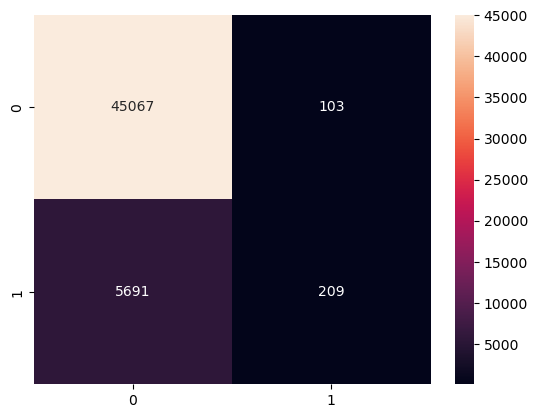

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

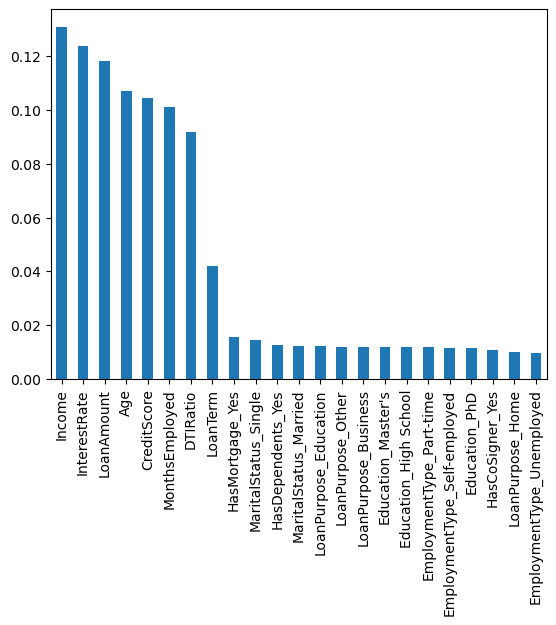

In [26]:
# Feature Importance

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind="bar")
plt.show()

In [40]:
#Example for uderstanding
trained_columns = X.columns

In [35]:
new_customer_raw = pd.DataFrame({
    "Age": [35],
    "Income": [50000],
    "LoanAmount": [200000],
    "CreditScore": [720],
    "LoanTerm": [36],
    "InterestRate": [8.5],
    "DTIRatio": [0.30],
    "MonthsEmployed": [60],
    "Education": ["Graduate"],
    "EmploymentType": ["Salaried"],
    "MaritalStatus": ["Single"],
    "LoanPurpose": ["Personal"],
    "HasMortgage": ["No"],
    "HasDependents": ["No"],
    "HasCoSigner": ["No"]
})


In [36]:
new_customer_encoded = pd.get_dummies(new_customer_raw, drop_first=True)


In [37]:
new_customer_encoded = new_customer_encoded.reindex(
    columns=trained_columns, fill_value=0
)


In [38]:
new_scaled = scaler.transform(new_customer_encoded)
prediction = rf.predict(new_scaled)

prediction


array([0], dtype=int64)

0 → No Default
1 → Default

In [41]:
import joblib

# Save trained objects
joblib.dump(rf, "loan_default_rf_model.pkl")
joblib.dump(scaler, "loan_default_scaler.pkl")
joblib.dump(trained_columns, "loan_default_columns.pkl")

['loan_default_columns.pkl']